In [2]:
import numpy as np
import networkx as nx
import seaborn as sns
from graspologic.plot import heatmap

# Exploring Different Kernels

Here we construct a basic pipeline of comparing different graph kernels from the [GraKel](https://ysig.github.io/GraKeL/0.1a8/) package. 

First, we load in 32 networks that were generated from MRI scans of mice brains, provided by [Graspologic](https://microsoft.github.io/graspologic/latest/index.html). The mice came from 4 different genotypes, and there were 8 mice per genotype. 

## Load Data

In [32]:
from graspologic.datasets import load_mice
from grakel import Graph

# Load the full mouse dataset
mice = load_mice()

# Stack all adjacency matrices in a 3D numpy array
graphs = np.array(mice.graphs)
print(graphs.shape)

# initialize labels
labels = {}
for i in np.arange(0, 332):
    labels[i] = i

# Convert adjacency matrices to grakel objects
Gs = []
for graph in graphs:
    test = Graph(initialization_object = graph, node_labels=labels)
    Gs.append(test)

print(len(Gs))

(32, 332, 332)
32


## Some "Null" Kernels

### Absolute Difference in Density
The density of each graph was calculated by dividing the number of edges by the number of possible nodes. The differences are plotted using a heatmap below.

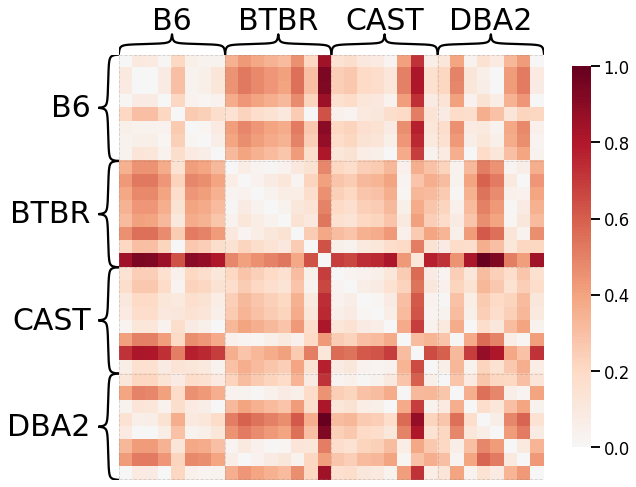

In [27]:
num_nodes = graphs.shape[1]
num_nodes_possible = num_nodes ** 2 - num_nodes

# calculate density of each graph
density = np.zeros(len(graphs))
for i in range(len(graphs)):
    num_edges = np.count_nonzero(graphs[i])
    density[i] = num_edges / num_nodes_possible

# calculate absolute difference of density 
dissimilarity_matrix = np.zeros((len(graphs), len(graphs)))
for j in range(len(density)):
    for k in range(len(density)):
        diff = np.abs(density[j] - density[k])
        dissimilarity_matrix[j, k] = diff

# plot heatmap
scaled_dissimilarity = dissimilarity_matrix / np.max(dissimilarity_matrix)

ax = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)
ax.figure.set_facecolor('w')

### Absolute Difference in Node Degrees
The degree of a node in a graph is the number of nodes each node is adjacent to, aka the number of edges each node has. The absolute differences of each node degree was calculated and plotted using a heatmap.

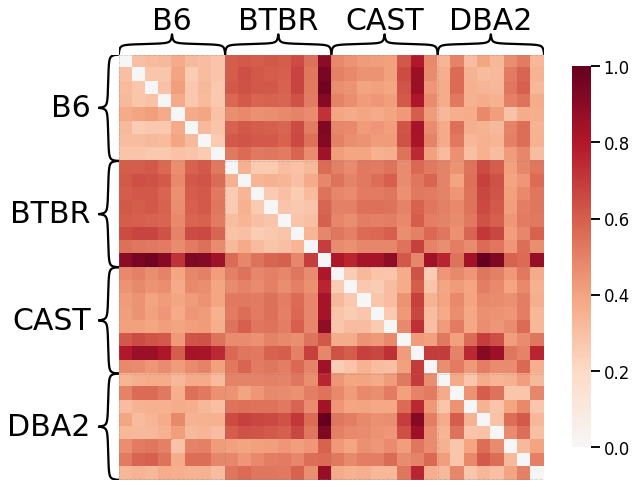

In [28]:
degrees = np.zeros((graphs.shape[0], graphs.shape[1]))
for i, graph in enumerate(graphs):
    for j, row in enumerate(graph):
        degrees[i, j] = np.count_nonzero(row)

for i, degree1 in enumerate(degrees):
    for j, degree2 in enumerate(degrees):
        diff = np.linalg.norm(degree1 - degree2)
        dissimilarity_matrix[i, j] = diff

scaled_dissimilarity = dissimilarity_matrix / np.max(dissimilarity_matrix)

ax = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)
ax.figure.set_facecolor('w')

## Using Kernels from GraKel

(32, 32)


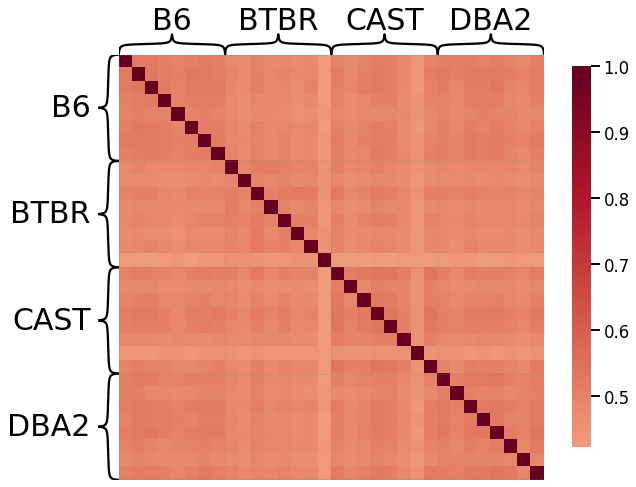

In [6]:
### Shortest Path 
from grakel.kernels import ShortestPath

kernel = ShortestPath(with_labels=True)
Ks = kernel.fit_transform(Gs)

print(Ks.shape)

scaled_dissimilarity = Ks / np.max(Ks)

ax = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)
ax.figure.set_facecolor('w')

(32, 32)


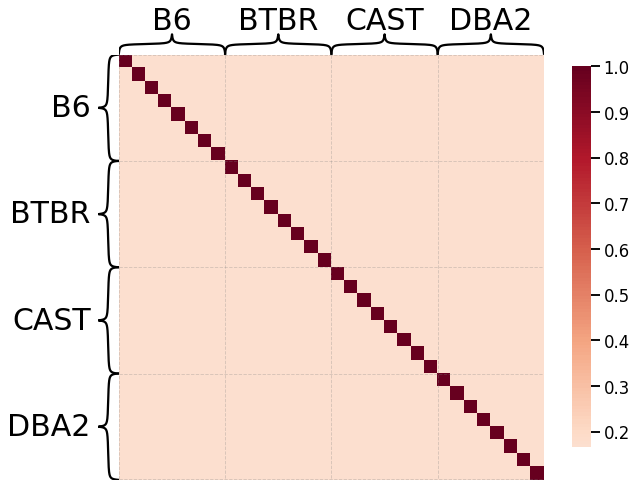

In [5]:
from grakel.kernels import WeisfeilerLehman, VertexHistogram

kernel = WeisfeilerLehman(base_graph_kernel=VertexHistogram, normalize=False)
Ks = kernel.fit_transform(Gs)
print(Ks.shape)

scaled_dissimilarity = Ks / np.max(Ks)

ax = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)
ax.figure.set_facecolor('w')

### From Ben's NDS class [Network Data Science](https://bdpedigo.github.io/networks-course/multiple_embedding.html#representations-for-each-network)

In [45]:
from graspologic.embed import OmnibusEmbed

# Embed using Omni
embedder = OmnibusEmbed(n_elbows=3)
omni_embedding = embedder.fit_transform(graphs)
print(omni_embedding.shape)

(32, 332, 9)


In [46]:
# Create dissimilarity matrix
dissimilarity_matrix = np.zeros((len(graphs), len(graphs)))

for i, embedding1 in enumerate(omni_embedding):
    for j, embedding2 in enumerate(omni_embedding):
        dist = np.linalg.norm(embedding1 - embedding2, ord="fro")
        dissimilarity_matrix[i, j] = dist

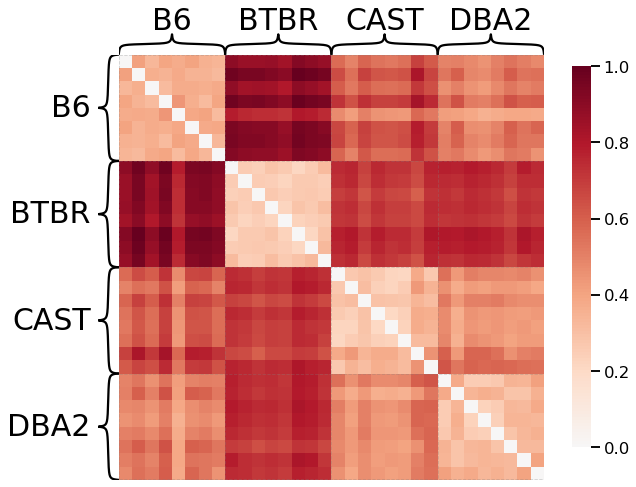

In [48]:
from graspologic.plot import heatmap
scaled_dissimilarity = dissimilarity_matrix / np.max(dissimilarity_matrix)

_ = heatmap(scaled_dissimilarity, context="talk", inner_hier_labels=mice.labels)